In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shape_state = gpd.read_file('Indian_States.shp')
shape_state.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [3]:
editst=pd.read_csv('edit_st.csv')
edit1=shape_state.merge(editst, left_on = 'st_nm', right_on ='state_trial');

edit2=edit1.drop(columns=["state_trial","st_nm"])
edit3=edit2[['state_name11','geometry']]

In [14]:
final1=edit3.dissolve(by="state_name11")
final1.head()

,geometry
state_name11,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
Assam,"MULTIPOLYGON (((95.96661 27.94694, 95.95369 27..."
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."


In [30]:
Allst=pd.read_csv('2001_ind_st.csv')
Allst.head()

,st_nm,st_nm11,N,UP_POP,UP_LR,UP_WPR
0,Andaman & Nicobar Island,Andaman & Nicobar Island*,NaN,NaN,NaN,NaN
1,Andhra Pradesh,Andhra Pradesh,23.0,68.85,69.10,69.19
2,Arunanchal Pradesh,Arunanchal Pradesh,13.0,67.17,68.96,69.14
3,Assam,Assam,23.0,67.14,69.12,69.07
4,Bihar,Bihar,37.0,67.45,68.97,69.15


In [31]:
for_plotstates = final1.merge(Allst, left_on = 'state_name11', right_on = 'st_nm');
for_plotstates.head()

,geometry,st_nm,st_nm11,N,UP_POP,UP_LR,UP_WPR
0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",Andaman & Nicobar Island,Andaman & Nicobar Island*,NaN,NaN,NaN,NaN
1,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Andhra Pradesh,Andhra Pradesh,23.0,68.85,69.10,69.19
2,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",Arunanchal Pradesh,Arunanchal Pradesh,13.0,67.17,68.96,69.14
3,"MULTIPOLYGON (((95.96661 27.94694, 95.95369 27...",Assam,Assam,23.0,67.14,69.12,69.07
4,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",Bihar,Bihar,37.0,67.45,68.97,69.15


In [32]:
for_plotstates["center"] = for_plotstates["geometry"].centroid
for_plotstates_points = for_plotstates.copy()
for_plotstates_points.set_geometry("center", inplace = True)

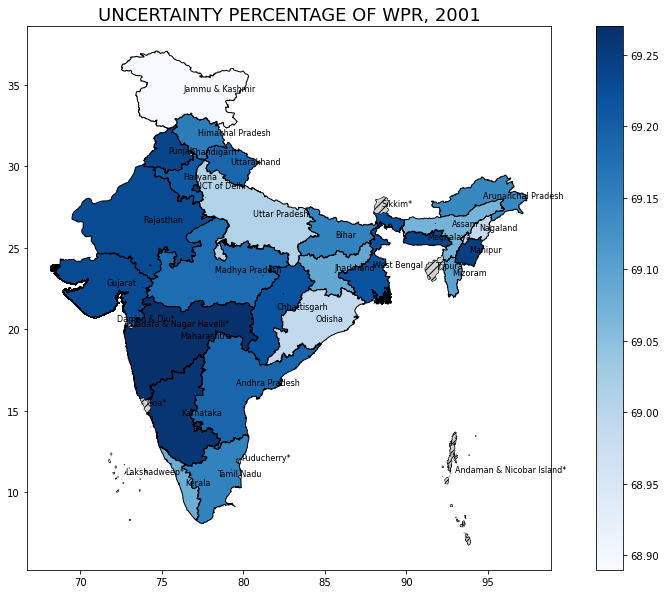

In [37]:
ax=for_plotstates.plot(column='UP_WPR',cmap ='Blues',edgecolor='black', figsize=(16,10),legend =True);
for_plotstates[for_plotstates.UP_WPR.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('UNCERTAINTY PERCENTAGE OF WPR, 2001', fontsize=18)
texts = []

for x, y, label in zip(for_plotstates_points.geometry.x,for_plotstates_points.geometry.y,for_plotstates_points["st_nm11"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

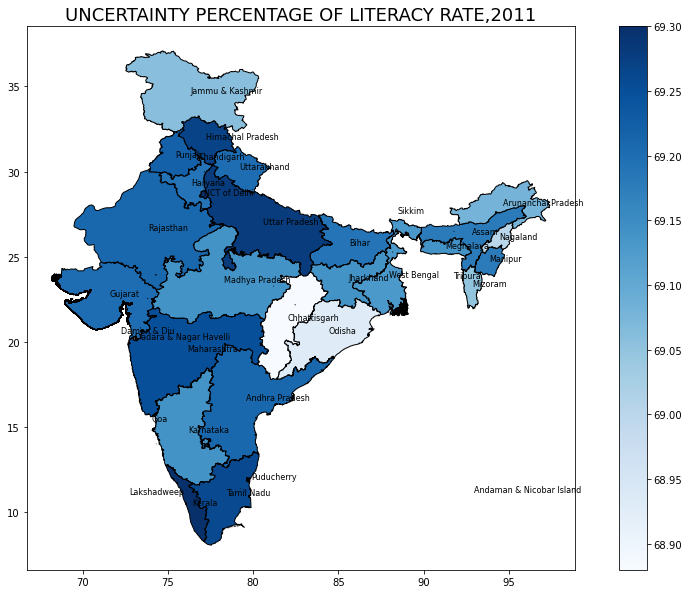

In [19]:
for_plotstates.dropna().plot(column='UP_LR', cmap ='Blues',edgecolor='black', figsize=(16,10),legend =True);
plt.title('UNCERTAINTY PERCENTAGE OF LITERACY RATE,2011', fontsize=18)
texts = []

for x, y, label in zip(for_plotstates_points.geometry.x,for_plotstates_points.geometry.y,for_plotstates_points["st_nm"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

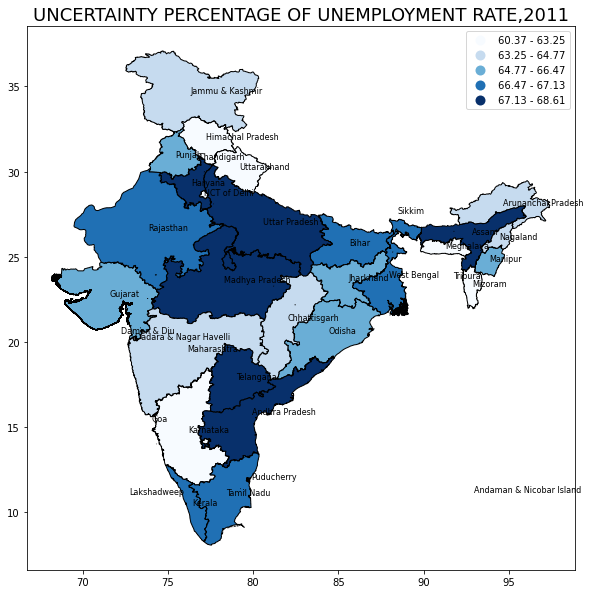

In [123]:
for_plotstates.dropna().plot(column='UP S(NW)11', cmap ='Blues',edgecolor='black', figsize=(16,10),scheme='Quantiles',legend =True);
plt.title('UNCERTAINTY PERCENTAGE OF UNEMPLOYMENT RATE,2011', fontsize=18)
texts = []

for x, y, label in zip(for_plotstates_points.geometry.x,for_plotstates_points.geometry.y,for_plotstates_points["st_nm"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [72]:
X=Allst["a(pop)"].dropna()
Y=Allst["b1"].dropna()
Z=Allst["S1"].dropna()


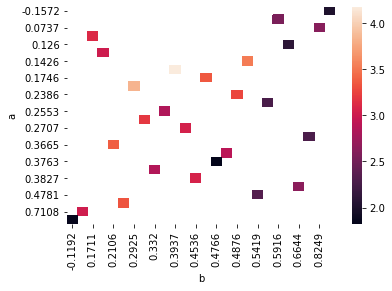

In [75]:

data = pd.DataFrame({'a': X, 'b': Y, 'S': Z})
data_pivoted = data.pivot("a", "b", "S")
ax = sns.heatmap(data_pivoted)
plt.show()